In [169]:
# 전역 변수 설정
VOCAB_SIZE = 44851  # 단어 사전 크기
MAX_LEN = 447       # 패딩할 최대 문장 길이

In [170]:
import pandas as pd

df = pd.read_csv("/content/IMDB Dataset.csv") # https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


print("=" * 60)
print("IMDB Data Set")
print("=" * 60)
print(f"총 데이터 개수: {len(df)}")
print(f"\n감정 분포:")
print(df['sentiment'].value_counts())
print(f"\n컬럼 정보:")
print(df.info())
print("\n샘플:")
print(df.head())


IMDB Data Set
총 데이터 개수: 50000

감정 분포:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

샘플:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [171]:
# HTML 태그 제거
import re
import html # HTML 엔티티 처리를 위해 import

def remove_html_tags_regex(text):
    # 1. HTML 태그 제거: <로 시작해서 >로 끝나는 모든 것을 찾음
    # <.*?> : . (모든 문자)가 * (0번 이상) 반복되는데, ? (non-greedy)
    # ?가 없으면 "<b>text</b>" 전체를 태그로 인식할 수 있음
    pattern = re.compile('<.*?>')
    cleaned_text = re.sub(pattern, ' ', text) # 태그를 공백(' ')으로 치환

    # 2. HTML 엔티티 변환 (e.g., &nbsp; -> 공백, &lt; -> <)
    cleaned_text = html.unescape(cleaned_text)

    # 3. 여러 개의 공백을 하나로 합침
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text

df['review'] = df['review'].apply(remove_html_tags_regex)
print("HTML 태그 제거 완료")
print("\nHTML 제거 샘플:")
print(df['review'][0])

HTML 태그 제거 완료

HTML 제거 샘플:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that

In [172]:
# 전처리 후 단어 개수 계산
df['word_count_after'] = df['review'].apply(lambda x: len(x.split()))

print("=" * 60)
print("전처리 후 단어 개수 통계")
print("=" * 60)
print(df['word_count_after'].describe())
print(f"\n중앙값(Median): {df['word_count_after'].median():.0f}")
print(f"최빈값(Mode): {df['word_count_after'].mode()[0]:.0f}")

# 백분위수 확인
print("\n백분위수 분포:")
for p in percentiles:
    value = np.percentile(df['word_count_after'], p)
    print(f"{p}%: {value:.0f} 단어")

전처리 후 단어 개수 통계
count    50000.000000
mean       228.865940
std        169.589105
min          4.000000
25%        125.000000
50%        171.000000
75%        278.000000
max       2459.000000
Name: word_count_after, dtype: float64

중앙값(Median): 171
최빈값(Mode): 123

백분위수 분포:
10%: 89 단어
20%: 118 단어
50%: 171 단어
70%: 245 단어
90%: 447 단어
95%: 585 단어
99%: 897 단어


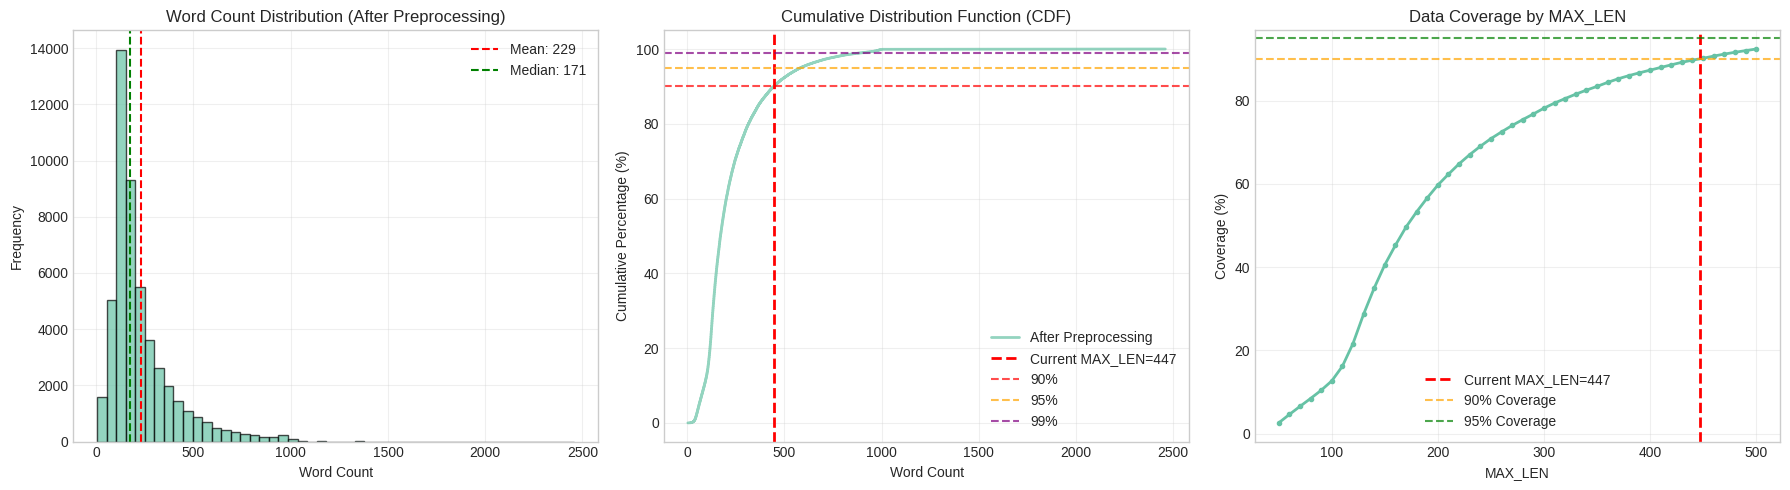

In [173]:
import matplotlib.pyplot as plt

# 전처리 후 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. 히스토그램
axes[0].hist(df['word_count_after'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df['word_count_after'].mean(), color='r', linestyle='--',
                label=f'Mean: {df["word_count_after"].mean():.0f}')
axes[0].axvline(df['word_count_after'].median(), color='g', linestyle='--',
                label=f'Median: {df["word_count_after"].median():.0f}')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Word Count Distribution (After Preprocessing)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. 누적 분포 (CDF)
sorted_after = np.sort(df['word_count_after'])
cumulative = np.arange(1, len(sorted_after) + 1) / len(sorted_after) * 100

axes[1].plot(sorted_after, cumulative, linewidth=2, label='After Preprocessing', alpha=0.7)
axes[1].axvline(MAX_LEN, color='r', linestyle='--', linewidth=2, label=f'Current MAX_LEN={MAX_LEN}')
axes[1].axhline(90, color='r', linestyle='--', alpha=0.7, label='90%')
axes[1].axhline(95, color='orange', linestyle='--', alpha=0.7, label='95%')
axes[1].axhline(99, color='purple', linestyle='--', alpha=0.7, label='99%')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Cumulative Percentage (%)')
axes[1].set_title('Cumulative Distribution Function (CDF)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. 커버리지 분석
truncation_rates = []
max_len_candidates = range(50, 501, 10)
for max_len in max_len_candidates:
    coverage = (df['word_count_after'] <= max_len).sum() / len(df) * 100
    truncation_rates.append(coverage)

axes[2].plot(max_len_candidates, truncation_rates, linewidth=2, marker='o', markersize=3)
axes[2].axvline(MAX_LEN, color='r', linestyle='--', linewidth=2, label=f'Current MAX_LEN={MAX_LEN}')
axes[2].axhline(90, color='orange', linestyle='--', alpha=0.7, label='90% Coverage')
axes[2].axhline(95, color='green', linestyle='--', alpha=0.7, label='95% Coverage')
axes[2].set_xlabel('MAX_LEN')
axes[2].set_ylabel('Coverage (%)')
axes[2].set_title('Data Coverage by MAX_LEN')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## MAX_LEN 설정을 위한 EDA
1. MAX_LEN을 너무 짧게 설정하면 중요한 정보가 손실됨
2. MAX_LEN을 너무 길게 설정하면 불필요한 Padding이 많이 들어감

## EDA 결과 분석
```
============================================================
전처리 후 단어 개수 통계
============================================================
count    50000.000000
mean       228.865940
std        169.589105
min          4.000000
25%        125.000000
50%        171.000000
75%        278.000000
max       2459.000000
```
- 평균(228) > 중앙값(171) : 중앙값보다 단어 수가 많은 리뷰가 더 많음
- 표준편차(169) : 단어 개수의 편차가 큼
- 최대값(2459)과 중앙값(171)의 큰 차이 : 이상치 존재

```
백분위수 분포:
10%: 89 단어
20%: 118 단어
50%: 171 단어
70%: 245 단어
90%: 447 단어
95%: 585 단어
99%: 897 단어
```
- 90% <-> 95% : 138단어 증가
- 95% <-> 99% : 312단어 증가
- 최대한 정보 손실을 막으면서 효율적인 학습을 위한 커버리지를 235 단어로 결정함

In [174]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# 모든 리뷰를 하나의 문자열로 합친 후 단어 리스트로 분리
all_tokens = ' '.join(df['review']).split()

# 단어 빈도 계산
word_counts = Counter(all_tokens)

print(f"총 사용된 단어 수: {len(all_tokens)}")
print(f"고유 단어 수: {len(word_counts)}")

print("\n--- 상위 20개 단어 ---")
print(word_counts.most_common(20))

총 사용된 단어 수: 11443297
고유 단어 수: 412542

--- 상위 20개 단어 ---
[('the', 569081), ('a', 307035), ('and', 302059), ('of', 283664), ('to', 261896), ('is', 203088), ('in', 170027), ('I', 139852), ('that', 126850), ('this', 113834), ('it', 107968), ('was', 92680), ('as', 83150), ('with', 82590), ('The', 81662), ('for', 80941), ('but', 66330), ('on', 61213), ('movie', 60791), ('are', 56523)]


In [175]:
# 한 번만 등장한 단어의 수
once_words = sum(1 for word, count in word_counts.items() if count == 1)
print(f"\n한 번만 등장한 단어 수: {once_words} (전체 고유 단어의 {once_words / len(word_counts) * 100:.2f}%)")

# 10번 미만 등장한 단어의 수
less_than_10_words = sum(1 for word, count in word_counts.items() if count < 10)
print(f"10번 미만 등장한 단어 수: {less_than_10_words} (전체 고유 단어의 {less_than_10_words / len(word_counts) * 100:.2f}%)")


한 번만 등장한 단어 수: 250140 (전체 고유 단어의 60.63%)
10번 미만 등장한 단어 수: 367691 (전체 고유 단어의 89.13%)


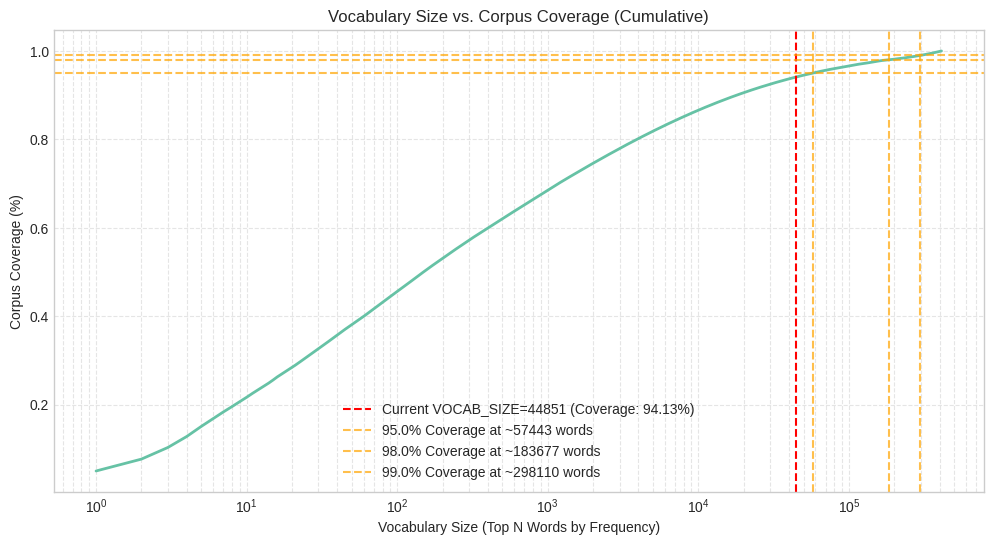

In [176]:
# 단어 빈도를 기준으로 내림차순 정렬
sorted_word_counts = word_counts.most_common()

# 누적 단어 등장 횟수 계산
total_word_occurrences = len(all_tokens)
cumulative_counts = []
cumulative_sum = 0

for word, count in sorted_word_counts:
    cumulative_sum += count
    cumulative_counts.append(cumulative_sum / total_word_occurrences)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_counts) + 1), cumulative_counts, linewidth=2)

# VOCAB_SIZE 표시
current_vocab_size = VOCAB_SIZE
if current_vocab_size < len(cumulative_counts):
    current_coverage = cumulative_counts[current_vocab_size - 1] * 100
    plt.axvline(current_vocab_size, color='r', linestyle='--',
                label=f'Current VOCAB_SIZE={current_vocab_size} (Coverage: {current_coverage:.2f}%)')

# 커버리지 95%, 98%, 99% 선 표시
for coverage_percent in [0.95, 0.98, 0.99]:
    try:
        vocab_needed = next(i for i, total_coverage in enumerate(cumulative_counts) if total_coverage >= coverage_percent) + 1
        plt.axhline(coverage_percent, color='orange', linestyle='--', alpha=0.7,
                    label=f'{coverage_percent*100}% Coverage at ~{vocab_needed} words')
        plt.axvline(vocab_needed, color='orange', linestyle='--', alpha=0.7)
    except StopIteration:
        pass

plt.title('Vocabulary Size vs. Corpus Coverage')
plt.xlabel('Vocabulary Size (Top N Words by Frequency)')
plt.ylabel('Corpus Coverage (%)')
plt.xscale('log')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend()
plt.show()

## VOCAB_SIZE 설정을 위한 EDA
```
총 사용된 단어 (토큰) 수: 11443297
고유 단어 (Vocabulary) 수: 412542
```
## EDA 결과 분석
```
한 번만 등장한 단어 수: 250140 (전체 고유 단어의 60.63%)
10번 미만 등장한 단어 수: 367691 (전체 고유 단어의 89.13%)
```
- 10번도 나오지 않은 단어를 모델이 학습하기에는 어려움이 있음
- 이와 같은 단어는 사실상 노이즈에 가까워서 제거하는 것이 필수적임
- VOCAB_SIZE = 412542(전체 단어) - 367691(10번 이하 등장 단어) = 44851 으로 설정함
- 노이즈를 제거하면서 94.13% 커버리지 달성